In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler , OneHotEncoder
import umap
from sklearn.linear_model import LinearRegression, Ridge , ElasticNet
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
from sklearn.feature_selection import RFE
from sklearn.decomposition import FastICA
from sklearn.ensemble import GradientBoostingRegressor

(a) (2.5 marks) Perform EDA by creating pair plots, box plots, violin plots, count plots
for categorical features, and a correlation heatmap. Based on these visualizations,
provide at least five insights on the dataset.

In [18]:
data1 = pd.read_csv('Electricity BILL.csv') #reading the data
train_set  , test_set = train_test_split(data1 , test_size = 0.2 , random_state = 42) #splitting the data into training and testing set

Categorical_values = ['Building_Type' , 'Building_Status' , 'Maintenance_Priority' , 'Green_Certified'] #categorical values
Numerical_values = ['Construction_Year' , 'Number_of_Floors' , 'Energy_Consumption_Per_SqM' , 'Water_Usage_Per_Building' , 'Waste_Recycled_Percentage' , 'Occupancy_Rate' , 'Indoor_Air_Quality' , 'Smart_Devices_Count' , 'Maintenance_Resolution_Time' , 'Energy_Per_SqM' , 'Number_of_Residents'] #numerical values

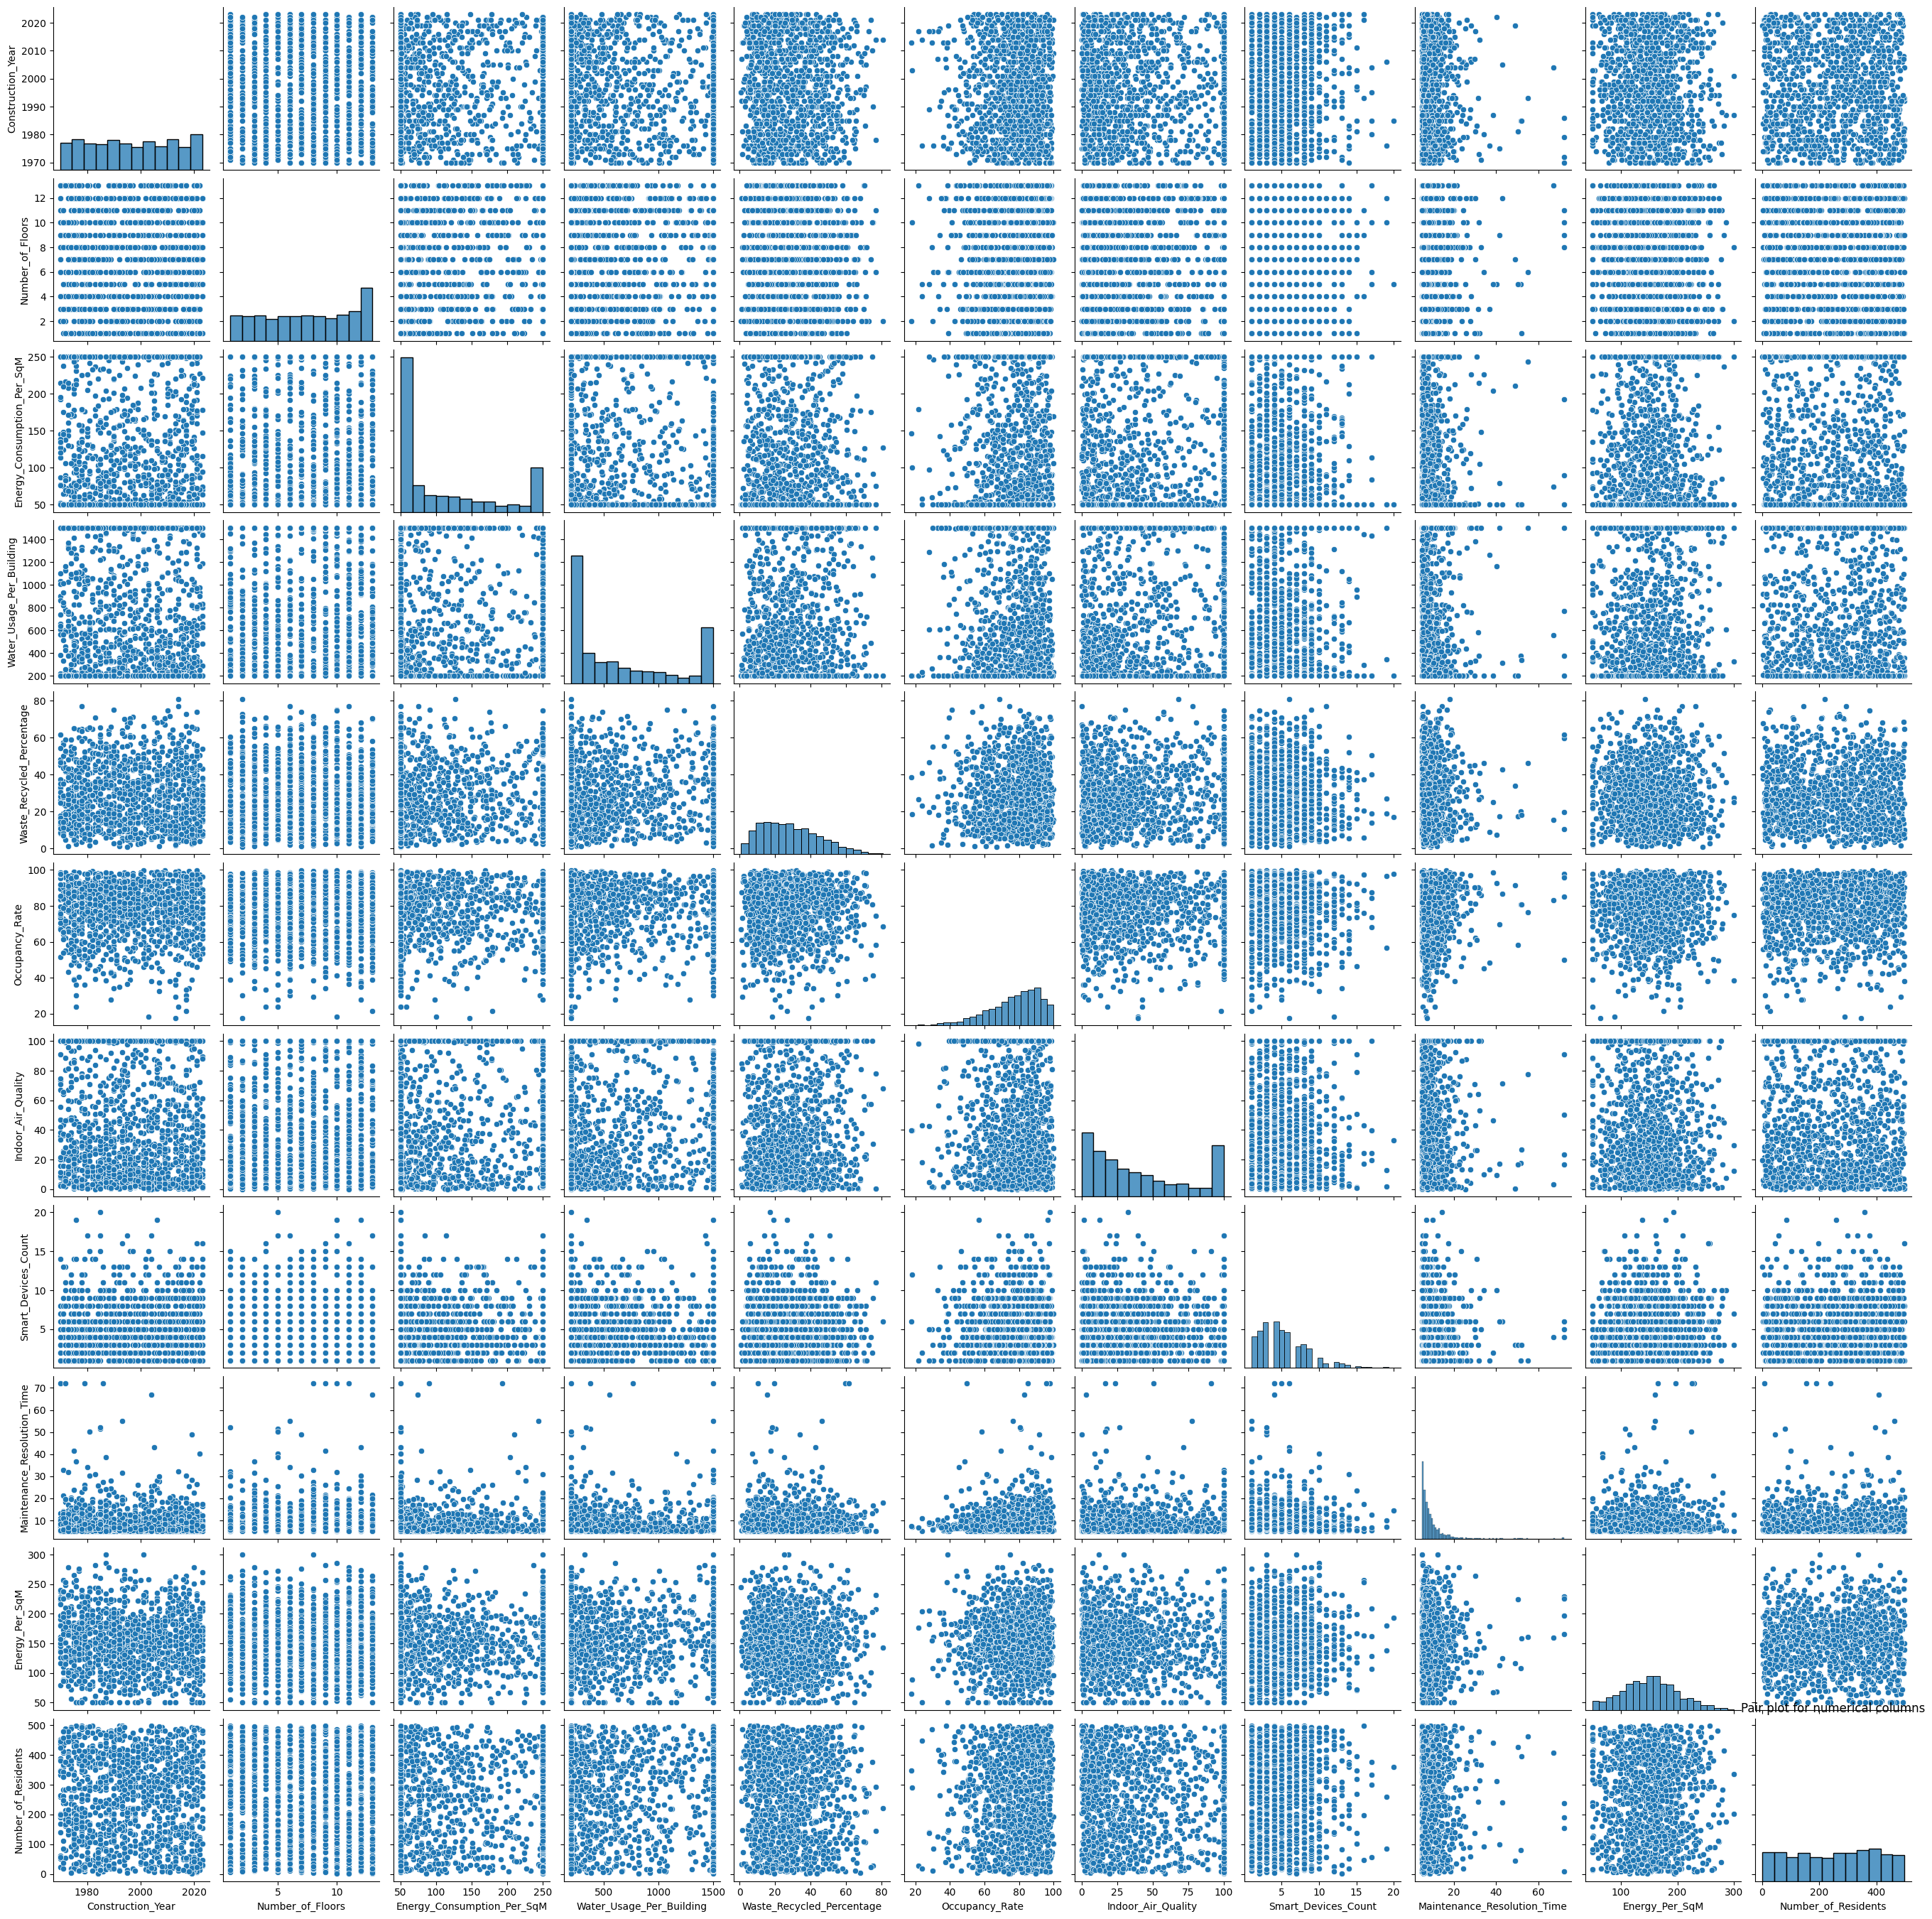

In [19]:
numerical_data = data1[Numerical_values] #numerical data
#doing eda on entire dataset for numerical columns
sns.pairplot(numerical_data)  #pairplot for numerical columns
mat.title('Pair plot for numerical columns') #title of the plot
mat.show() #showing the plot

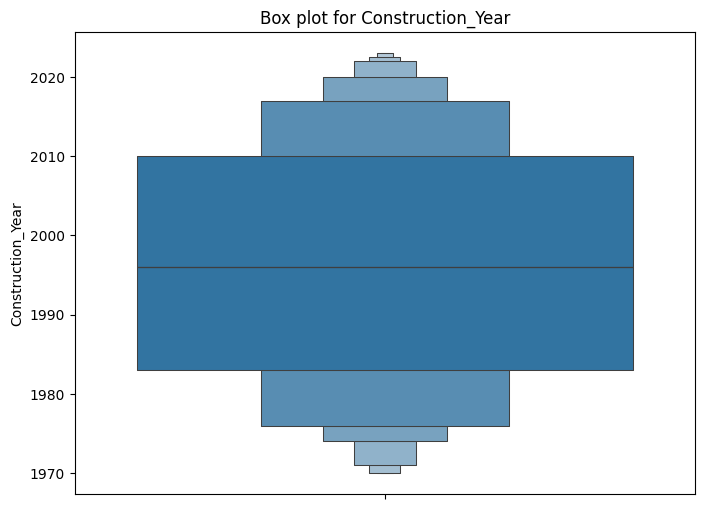

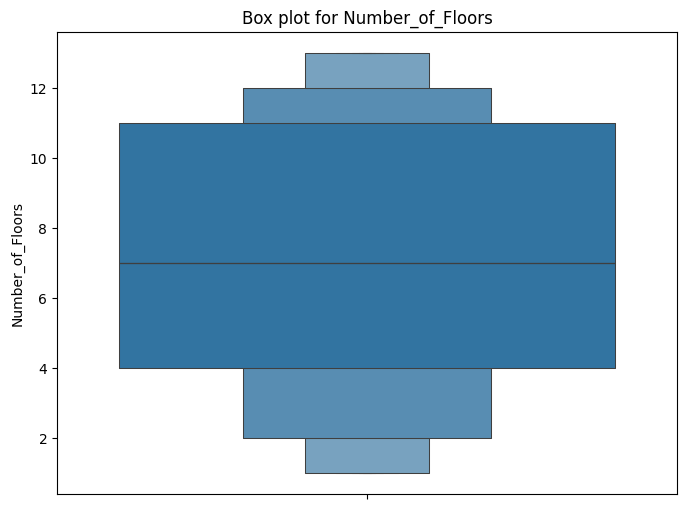

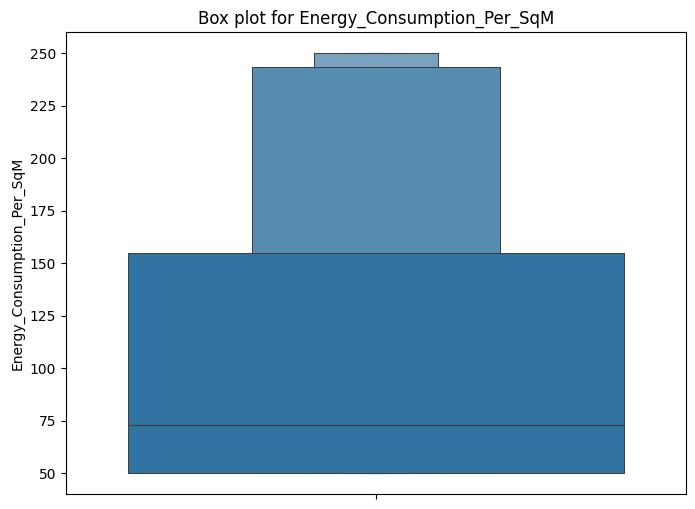

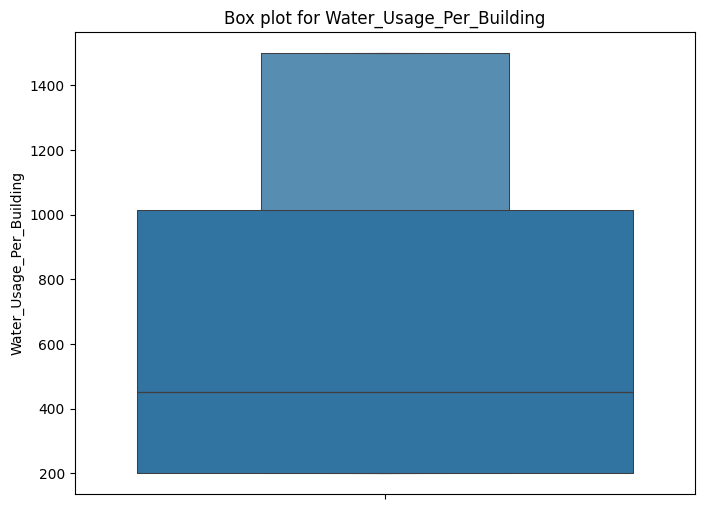

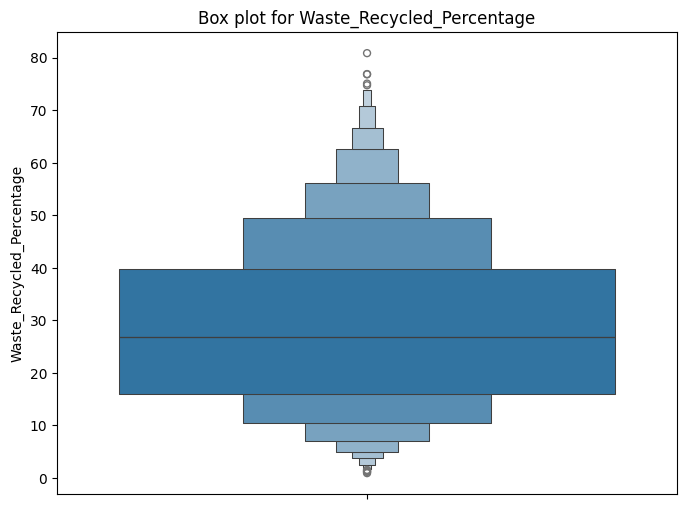

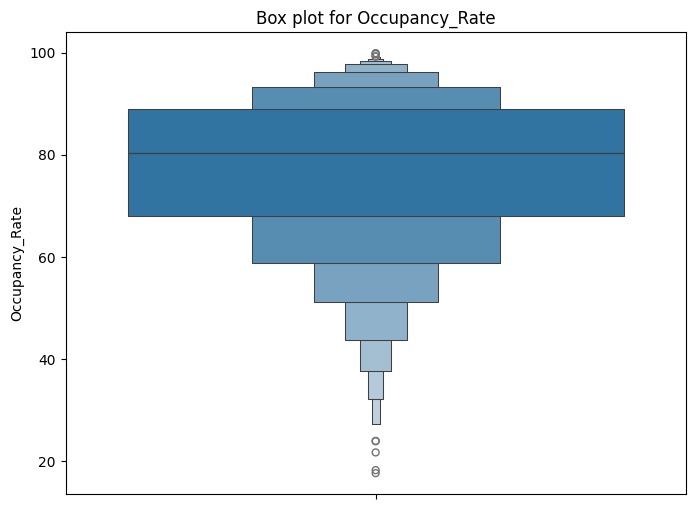

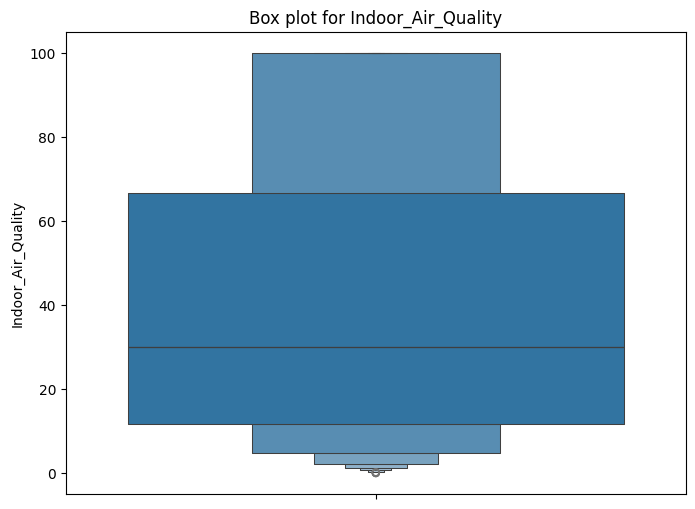

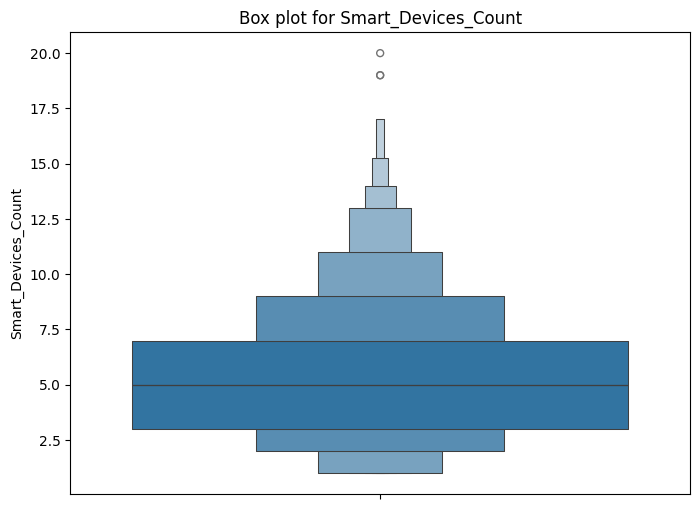

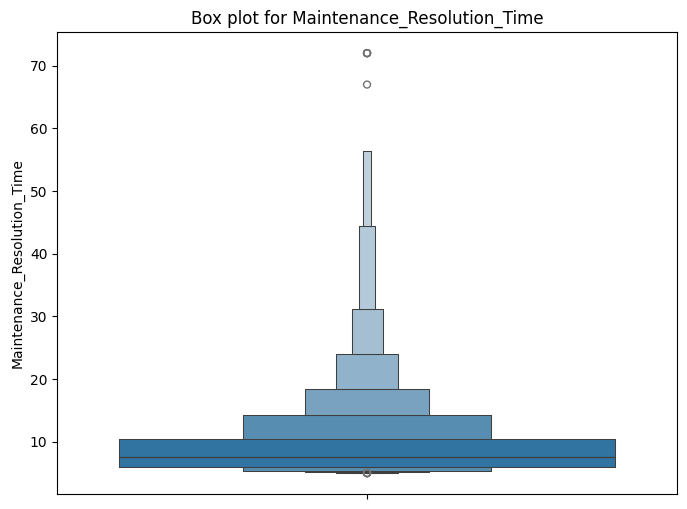

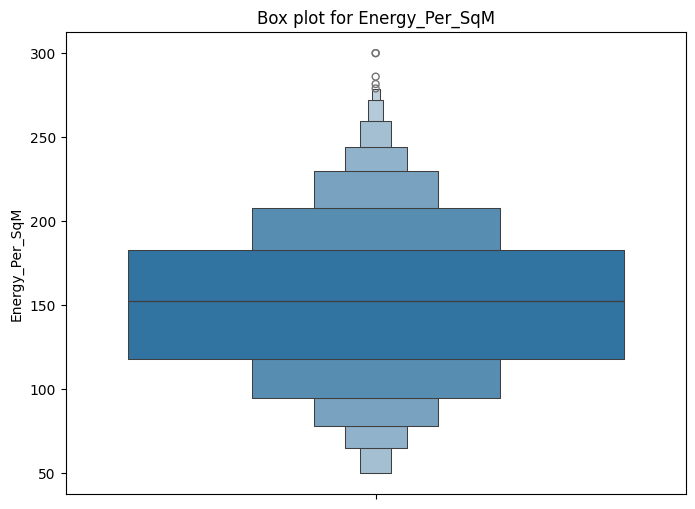

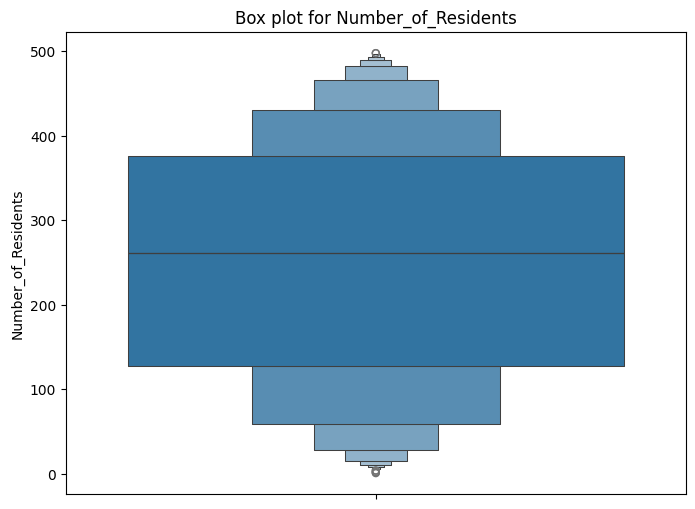

In [4]:
for col in Numerical_values: #for loop for box plot
    mat.figure(figsize=(8,6)) 
    sns.boxenplot(data = data1[col])
    mat.title('Box plot for ' + col)
    mat.xticks(rotation = 90)
    mat.show()

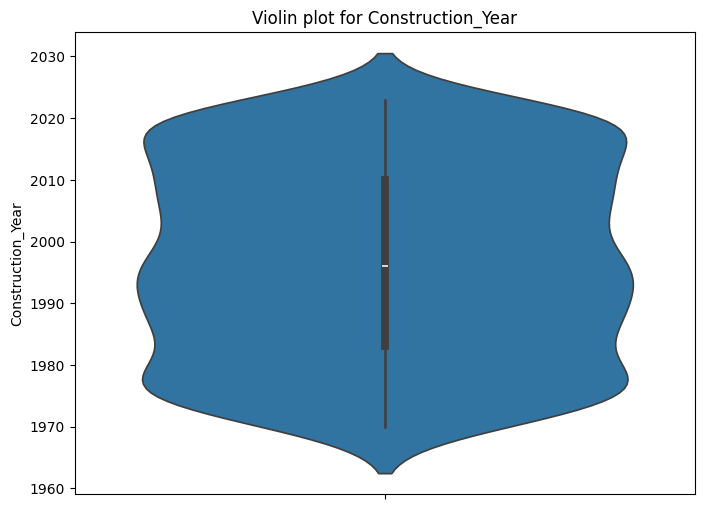

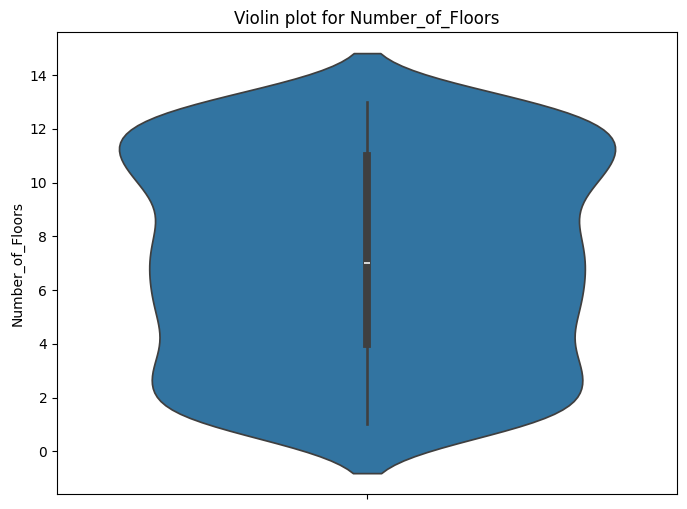

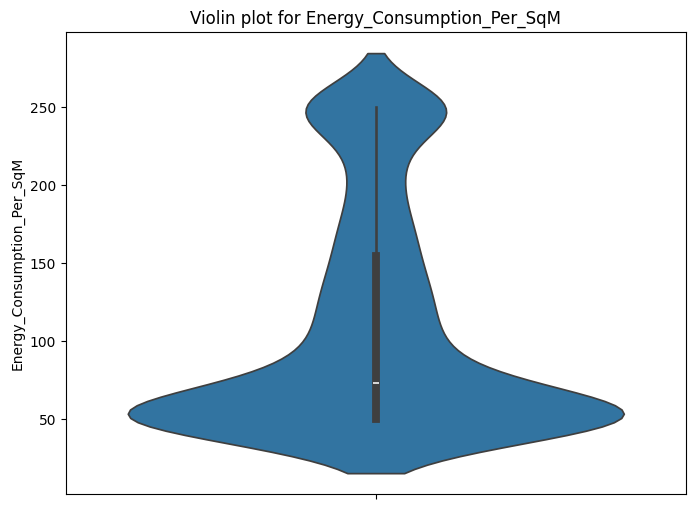

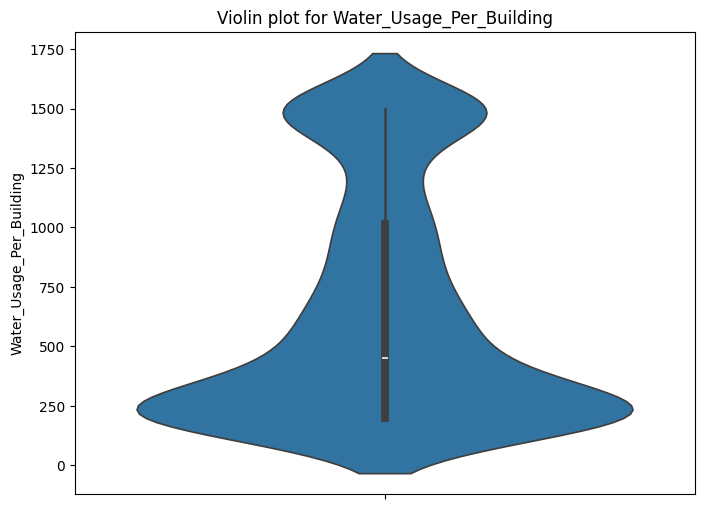

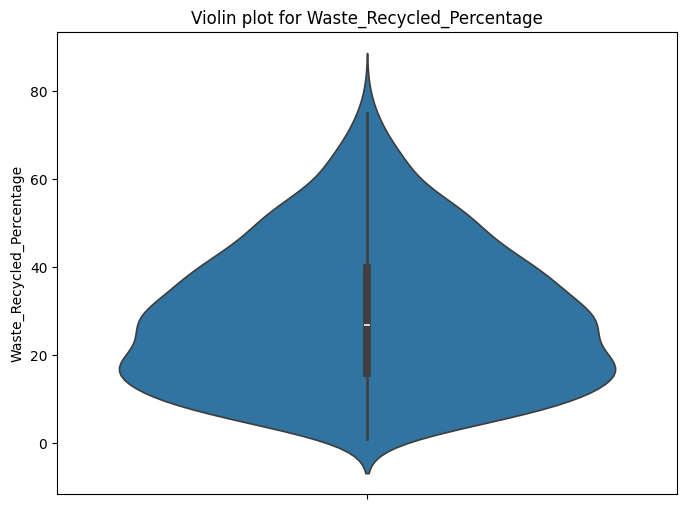

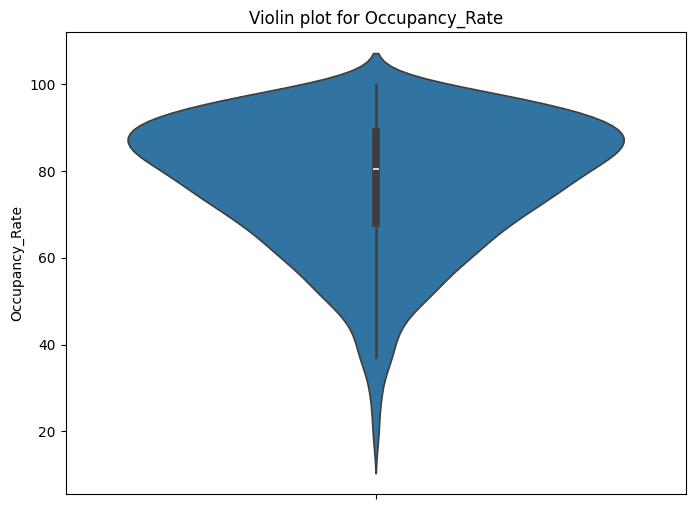

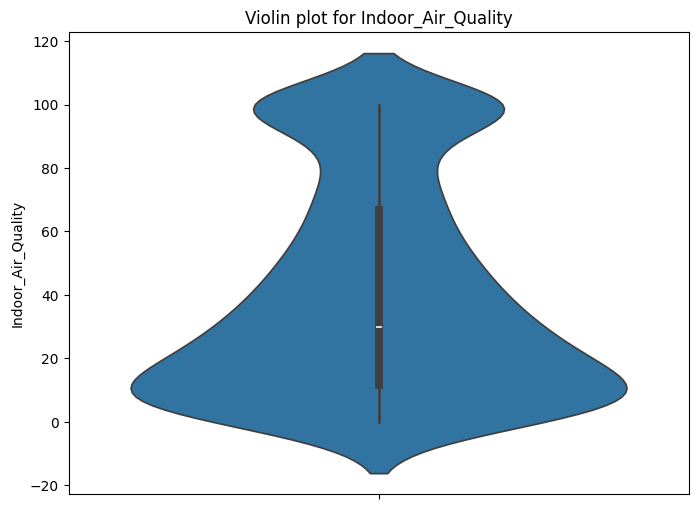

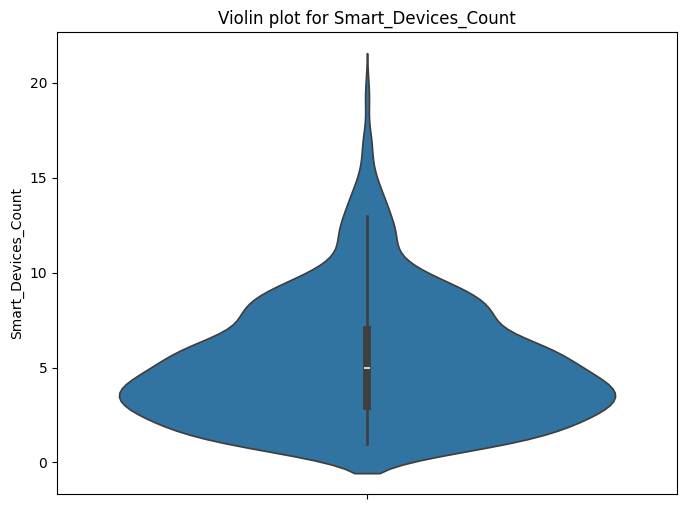

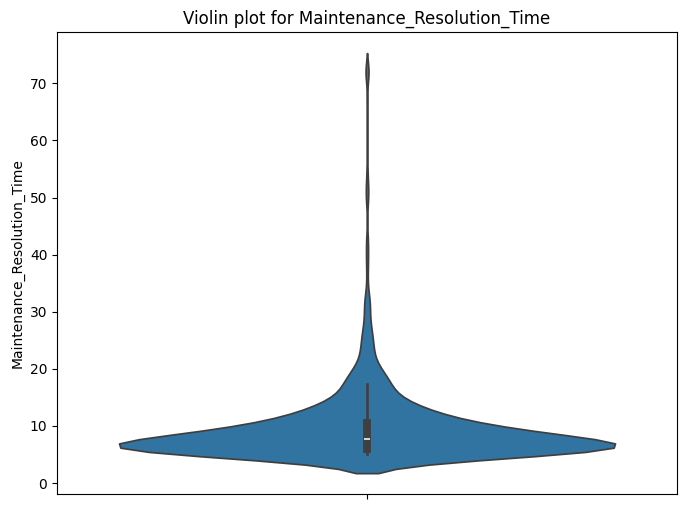

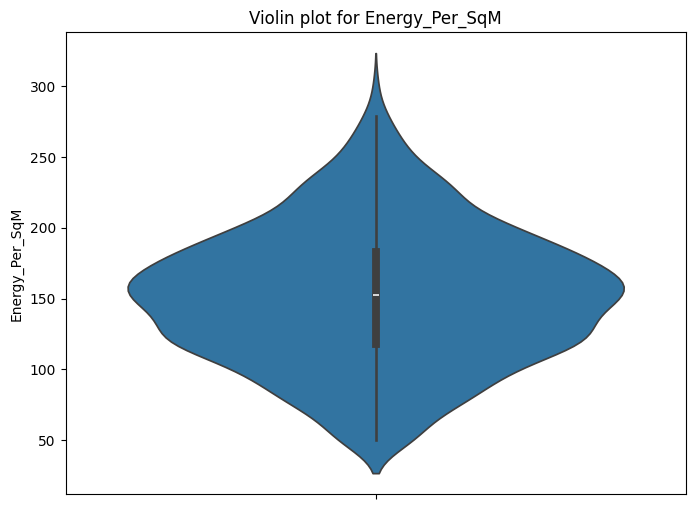

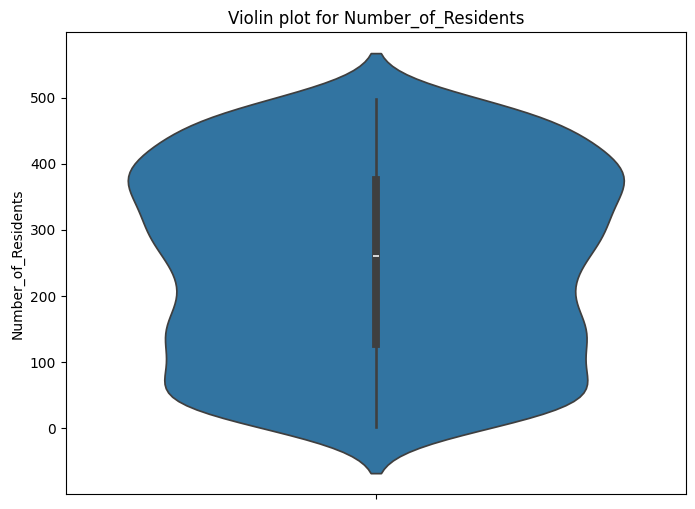

In [5]:
for col in Numerical_values : #for loop for violin plot
    mat.figure(figsize=(8,6))
    sns.violinplot(data = data1[col])
    mat.title('Violin plot for ' + col)
    mat.xticks(rotation = 90)
    mat.show()

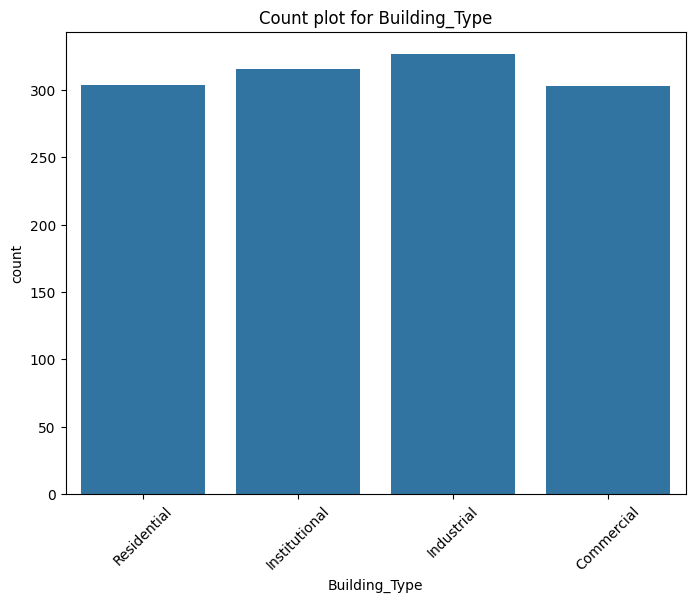

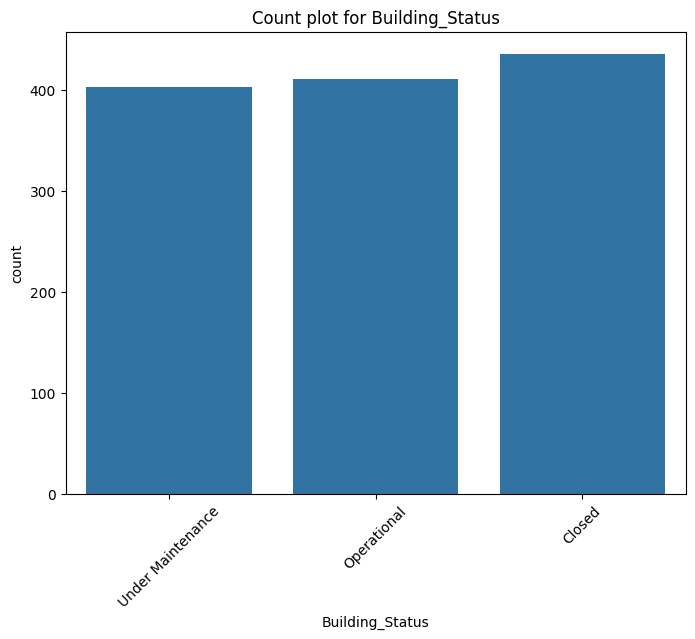

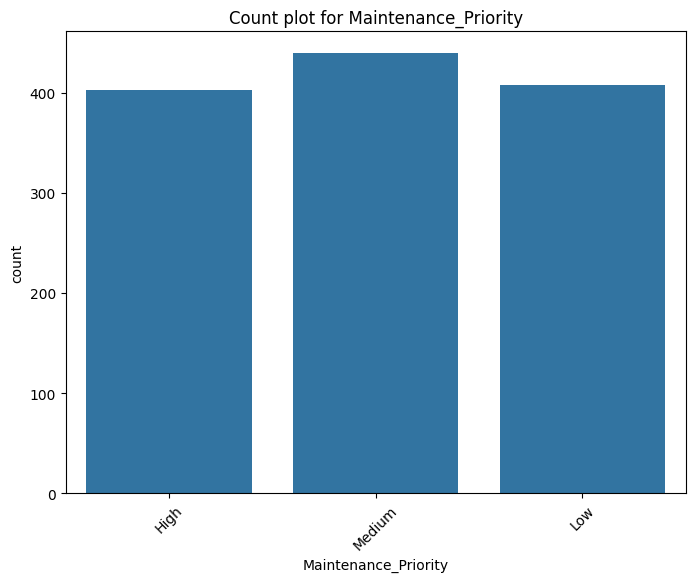

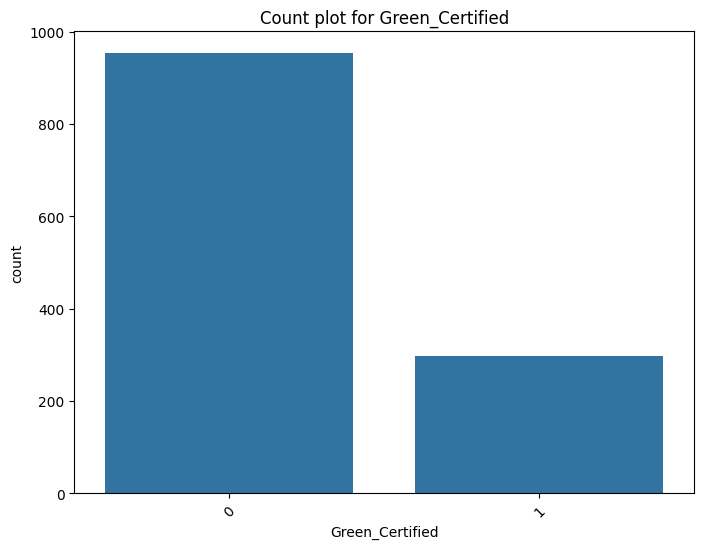

In [6]:
for col in Categorical_values :  #for loop for count plot
    mat.figure(figsize=(8,6))
    sns.countplot(x = col , data=data1)
    mat.title('Count plot for ' + col)
    mat.xticks(rotation=45)
    mat.show()

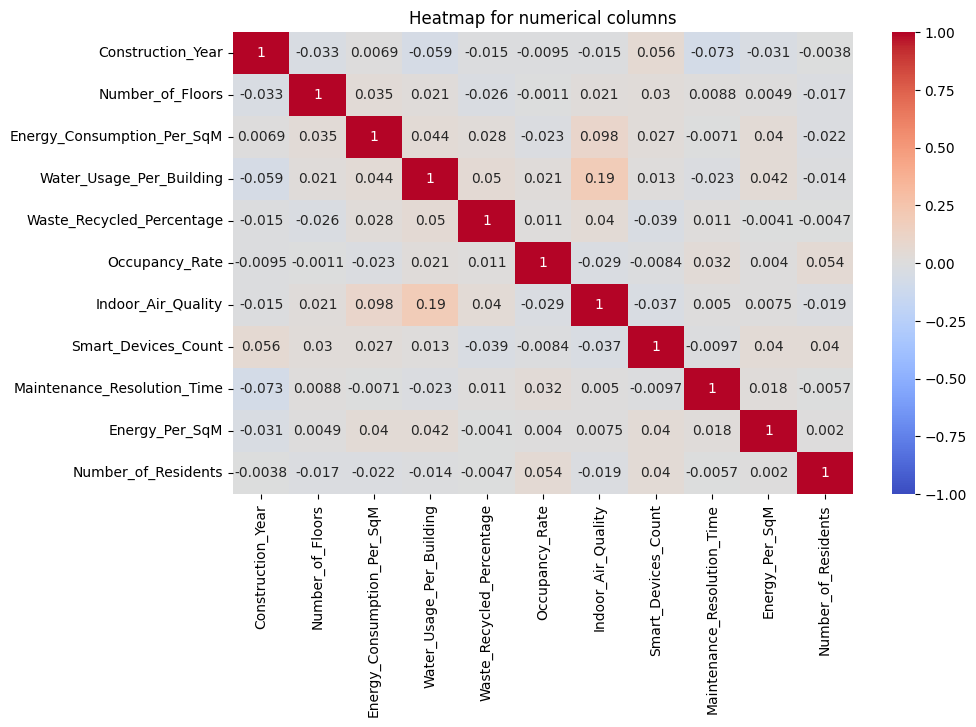

In [15]:
mat.figure(figsize=(10,6)) #bar plot for numerical columns 
correlation = numerical_data.corr() #correlation matrix
sns.heatmap(correlation, annot = True , cmap='coolwarm' , vmin= - 1 , vmax=1) # heatmap for numerical columns , where more intense red color shows close to 1 and blue shows close to -1
mat.title('Heatmap for numerical columns') 
mat.show() 

(b) (1 marks)Use the Uniform Manifold Approximation and Projection (UMAP) algo-
rithm to reduce the data dimensions to 2 and plot the resulting data as a scatter
plot. Comment on the separability and clustering of the data after dimensionality
reduction.

c:\Users\sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


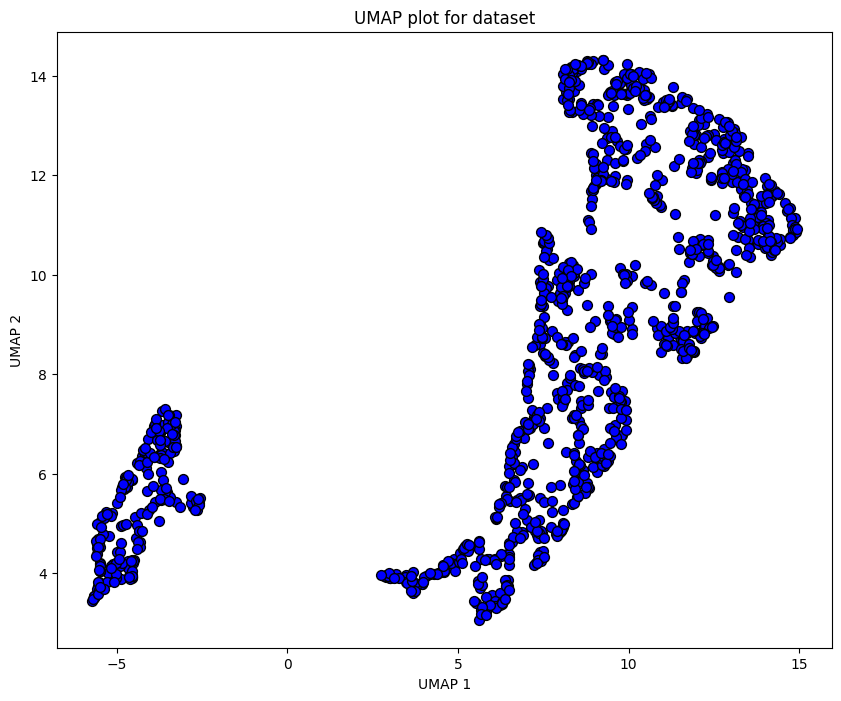

In [20]:
labelEncoding = {} #label encoding for categorical columns
for col in Categorical_values:  #for loop for label encoding
    encoder = LabelEncoder()
    data1[col] = encoder.fit_transform(data1[col])
    labelEncoding[col] = encoder
dataset = data1[Categorical_values + Numerical_values] #dataset after label encoding 

umapModel = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2 , random_state=42) #umap model
umapResult = umapModel.fit_transform(dataset) #fitting the model on dataset


mat.figure(figsize=(10,8))
mat.scatter(umapResult[:,0] , umapResult[:,1] , c = 'blue' , edgecolors='k' , s = 50)
mat.title('UMAP plot for dataset')
mat.xlabel('UMAP 1')
mat.ylabel('UMAP 2')
mat.show()


(c) (2.5 marks) Perform the necessary pre-processing steps, including handling missing
values and normalizing numerical features. For categorical features, use LabelEn-
coding. Apply Linear Regression on the preprocessed data. Report Mean Squared
Error (MSE), Root Mean Squared Error (RMSE), R2 score, Adjusted R2 score,
and Mean Absolute Error (MAE) on the train and test data.

In [9]:
for col in Numerical_values : #for loop for histogram 
    data1[col].fillna(data1[col].mean() , inplace = True) #filling the missing values with mean value of the column 
for col in Categorical_values: #for loop for histogram
    data1[col].fillna(data1[col].mode()[0] , inplace = True) #filling the missing values with mode value of the column
     
    
labelEncoding = {} #label encoding for categorical columns
for col in Categorical_values: #for loop for label encoding
    encoder = LabelEncoder()    
    data1[col] = encoder.fit_transform(data1[col]) 
    labelEncoding[col] = encoder 

scalar = StandardScaler() #standard scaling for numerical columns
data1[Numerical_values] = scalar.fit_transform(data1[Numerical_values]) #fitting the scalar on numerical columns

xData = data1[Categorical_values + Numerical_values] #xData
yData = data1['Electricity_Bill'] #yData
xTrain , xTest , yTrain , yTest = train_test_split(xData , yData , test_size = 0.2 , random_state = 42) #splitting the data into training and testing set

linearModel = LinearRegression() #linear regression model
linearModel.fit(xTrain , yTrain) #fitting the model on training data
 
yTrainPredict = linearModel.predict(xTrain) #predicting the values for training data

yTestPredict = linearModel.predict(xTest)   #predicting the values for testing data


def r2ScoreAdjusted(r2 , n , p): #adjusted r2 score
    return 1-((1-r2)*(n-1))/(n-p-1)

trainMSE = mean_squared_error(yTrain , yTrainPredict) #mean squared error for training data
trainRMSE = np.sqrt(trainMSE) #root mean squared error for training data 
trainMAE = mean_absolute_error(yTrain , yTrainPredict) #mean absolute error for training data
trainR2 = r2_score(yTrain , yTrainPredict) #r2 score for training data
trainAdjustedR2 = r2ScoreAdjusted(trainR2 , xTrain.shape[0] , xTrain.shape[1]) #adjusted r2 score for training data

testMSE = mean_squared_error(yTest , yTestPredict)
testRMSE = np.sqrt(testMSE)
testMAE = mean_absolute_error(yTest , yTestPredict)
testR2 = r2_score(yTest , yTestPredict)
testAdjustedR2 = r2ScoreAdjusted(testR2 , xTest.shape[0] , xTest.shape[1])

print(f'Training Mean Squared Error : {trainMSE}\nTraining Root Mean Squared Error : {trainRMSE}\nTraining Mean Absolute Error : {trainMAE}\nTraining R2 Score : {trainR2}\nTraining Adjusted R2 Score : {trainAdjustedR2}\n')
print(f'Test Mean Squared Error : {testMSE}\nTest Root Mean Squared Error : {testRMSE}\nTest Mean Absolute Error : {testMAE}\nTest R2 Score : {testR2}\nTest Adjusted R2 Score : {testAdjustedR2}\n')

    


Training Mean Squared Error : 24475013.16847547
Training Root Mean Squared Error : 4947.222773281538
Training Mean Absolute Error : 4006.3284693293604
Training R2 Score : 0.013922520844610209
Training Adjusted R2 Score : -0.0011091480449536562

Test Mean Squared Error : 24278016.155742623
Test Root Mean Squared Error : 4927.272689403604
Test Mean Absolute Error : 3842.409312558516
Test R2 Score : 3.7344733075372893e-05
Test Adjusted R2 Score : -0.0640628254763429



C:\Users\sahil\AppData\Local\Temp\ipykernel_6612\1131896578.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1[col].fillna(data1[col].mean() , inplace = True)
C:\Users\sahil\AppData\Local\Temp\ipykernel_6612\1131896578.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

(d) (2 marks) Perform Recursive Feature Elimination (RFE) or Correlation analysis on
the original dataset to select the 3 most important features. Train the regression
model using the selected features. Compare the results (MSE, RMSE, R2 score,
Adjusted R2 score, MAE) on the train and test dataset with the results obtained
in part (c).

In [10]:
modelRFE = LinearRegression() #linear regression model
RFEModel = RFE(modelRFE , n_features_to_select = 3) #recursive feature elimination model
RFEModel.fit(xTrain , yTrain) #fitting the model on training data

selectedFeatures = xTrain.columns[RFEModel.support_] #selected features
print('Selected features : ' , selectedFeatures)    

xTrainSelected = xTrain[selectedFeatures] #selected features for training data
xTestSelected = xTest[selectedFeatures] #selected features for testing data
 
modelSelected = LinearRegression() 
modelSelected.fit(xTrainSelected , yTrain)

yTrainPredictSelected = modelSelected.predict(xTrainSelected) #predicting the values for training data
yTestPredictSelected = modelSelected.predict(xTestSelected) #predicting the values for testing data

trainMSESSelected = mean_squared_error(yTrain , yTrainPredictSelected) 
trainRMSESSelected = np.sqrt(trainMSESSelected)
trainMAESSelected = mean_absolute_error(yTrain , yTrainPredictSelected)
trainR2SSelected = r2_score(yTrain , yTrainPredictSelected)
trainAdjustedR2SSelected = r2ScoreAdjusted(trainR2SSelected , xTrainSelected.shape[0] , xTrainSelected.shape[1])

testMSESSelected = mean_squared_error(yTest , yTestPredictSelected)
testRMSESSelected = np.sqrt(testMSESSelected)
testMAESSelected = mean_absolute_error(yTest , yTestPredictSelected)
testR2SSelected = r2_score(yTest , yTestPredictSelected)
testAdjustedR2SSelected = r2ScoreAdjusted(testR2SSelected , xTestSelected.shape[0] , xTestSelected.shape[1])

print("metrics using RFE:")
print(f'Training Mean Squared Error : {trainMSESSelected}\nTraining Root Mean Squared Error : {trainRMSESSelected}\nTraining Mean Absolute Error : {trainMAESSelected}\nTraining R2 Score : {trainR2SSelected}\nTraining Adjusted R2 Score : {trainAdjustedR2SSelected}\n')

print(f'Test Mean Squared Error : {testMSESSelected}\nTest Root Mean Squared Error : {testRMSESSelected}\nTest Mean Absolute Error : {testMAESSelected}\nTest R2 Score : {testR2SSelected}\nTest Adjusted R2 Score : {testAdjustedR2SSelected}\n')



Selected features :  Index(['Building_Type', 'Green_Certified', 'Number_of_Residents'], dtype='object')
metrics using RFE:
Training Mean Squared Error : 24569032.90689799
Training Root Mean Squared Error : 4956.715939702212
Training Mean Absolute Error : 4006.4733775147365
Training R2 Score : 0.010134545491283897
Training Adjusted R2 Score : 0.007153023037944406

Test Mean Squared Error : 23941409.06299838
Test Root Mean Squared Error : 4892.995918964002
Test Mean Absolute Error : 3813.948128176773
Test R2 Score : 0.013901513867940918
Test Adjusted R2 Score : 0.0018759225736475482



(e) (2 marks) Encode the categorical features of the original dataset using One-Hot
Encoding and perform Ridge Regression on the preprocessed data. Report the
evaluation metrics (MSE, RMSE, R2 score, Adjusted R2 score, MAE). Compare
the results with those obtained in part (c).

In [11]:
encodeNew = OneHotEncoder(drop='first' , sparse_output = False) #one hot encoding
categoricalEncoded = encodeNew.fit_transform(data1[Categorical_values]) #fitting the encoder on categorical columns

scalar = StandardScaler() #standard scaling for numerical columns
numericalScaled = scalar.fit_transform(data1[Numerical_values]) #fitting the scalar on numerical columns

Xpreprocessed = np.concatenate((categoricalEncoded , numericalScaled) , axis = 1)   #concatenating the encoded and scaled data

y = data1['Electricity_Bill'] #y data
 
XpreprocessedTrain , XpreprocessedTest , ypreprocessedTrain , ypreprocessedTest = train_test_split(Xpreprocessed , y , test_size = 0.2 , random_state = 42) #splitting the data into training and testing set

ridgeModel = Ridge(alpha=1.0) #ridge model
ridgeModel.fit(XpreprocessedTrain , ypreprocessedTrain) #fitting the model on training data

yTrainPredictRidge = ridgeModel.predict(XpreprocessedTrain) #predicting the values for training data
yTestPredictRidge = ridgeModel.predict(XpreprocessedTest) #predicting the values for testing data

trainMSERidge = mean_squared_error(ypreprocessedTrain , yTrainPredictRidge)
trainRMSERidge = np.sqrt(trainMSERidge)
trainMAERidge = mean_absolute_error(ypreprocessedTrain , yTrainPredictRidge)
trainR2Ridge = r2_score(ypreprocessedTrain , yTrainPredictRidge)
trainAdjustedR2Ridge = r2ScoreAdjusted(trainR2Ridge , XpreprocessedTrain.shape[0] , XpreprocessedTrain.shape[1])

testMSERidge = mean_squared_error(ypreprocessedTest , yTestPredictRidge)
testRMSERidge = np.sqrt(testMSERidge)
testMAERidge = mean_absolute_error(ypreprocessedTest , yTestPredictRidge)
testR2Ridge = r2_score(ypreprocessedTest , yTestPredictRidge)
testAdjustedR2Ridge = r2ScoreAdjusted(testR2Ridge , XpreprocessedTest.shape[0] , XpreprocessedTest.shape[1])

print("metrics using Ridge:")

print(f'Training Mean Squared Error : {trainMSERidge}\nTraining Root Mean Squared Error : {trainRMSERidge}\nTraining Mean Absolute Error : {trainMAERidge}\nTraining R2 Score : {trainR2Ridge}\nTraining Adjusted R2 Score : {trainAdjustedR2Ridge}\n')
print(f'Test Mean Squared Error : {testMSERidge}\nTest Root Mean Squared Error : {testRMSERidge}\nTest Mean Absolute Error : {testMAERidge}\nTest R2 Score : {testR2Ridge}\nTest Adjusted R2 Score : {testAdjustedR2Ridge}\n')


metrics using Ridge:
Training Mean Squared Error : 24188936.965879768
Training Root Mean Squared Error : 4918.224981218302
Training Mean Absolute Error : 3976.6800408346794
Training R2 Score : 0.025448287909988654
Training Adjusted R2 Score : 0.006553917981712898

Test Mean Squared Error : 24129021.617411178
Test Root Mean Squared Error : 4912.130048910673
Test Mean Absolute Error : 3797.5704274304762
Test R2 Score : 0.00617413009537271
Test Adjusted R2 Score : -0.07592452872283562



(f) (2 marks) Perform Independent Component Analysis (ICA) on the one-hot encoded
dataset and choose the appropriate number of components (try 4, 5, 6, and 8
components). Compare the results (MSE, RMSE, R2 score, Adjusted R2 score,
MAE) on the train and test dataset.

In [12]:
encoderNew = OneHotEncoder(drop='first' , sparse_output = False) #one hot encoding
categoricalEncoded = encoderNew.fit_transform(data1[Categorical_values]) #fitting the encoder on categorical columns

scalar = StandardScaler() #standard scaling for numerical columns
numericalScaled = scalar.fit_transform(data1[Numerical_values]) #fitting the scalar on numerical columns

Xpreprocessed = np.concatenate((categoricalEncoded , numericalScaled) , axis = 1) #concatenating the encoded and scaled data
y = data1['Electricity_Bill'] #y data

xpreprocessedTrain , xpreprocessedTest , ypreprocessedTrain , ypreprocessedTest = train_test_split(Xpreprocessed , y , test_size = 0.2 , random_state = 42) #splitting the data into training and testing set


def ICAondataset(NumberOfComponents): #ICA on dataset
    ica = FastICA(n_components = NumberOfComponents , random_state = 42) #ICA model
    xTrainICA = ica.fit_transform(xpreprocessedTrain) 
    xTestICA = ica.transform(xpreprocessedTest)
    
    modelICA = LinearRegression()   
    modelICA.fit(xTrainICA , ypreprocessedTrain) 
    
    yTrainPredictICA = modelICA.predict(xTrainICA)
    yTestPredictICA = modelICA.predict(xTestICA)
    
    trainMSEICA = mean_squared_error(ypreprocessedTrain , yTrainPredictICA)
    trainRMSEICA = np.sqrt(trainMSEICA)
    trainMAEICA = mean_absolute_error(ypreprocessedTrain , yTrainPredictICA)
    trainR2ICA = r2_score(ypreprocessedTrain , yTrainPredictICA)
    trainAdjustedR2ICA = r2ScoreAdjusted(trainR2ICA , xTrainICA.shape[0] , xTrainICA.shape[1])
    
    testMSEICA = mean_squared_error(ypreprocessedTest , yTestPredictICA)
    testRMSEICA = np.sqrt(testMSEICA)
    testMAEICA = mean_absolute_error(ypreprocessedTest , yTestPredictICA)
    testR2ICA = r2_score(ypreprocessedTest , yTestPredictICA)
    testAdjustedR2ICA = r2ScoreAdjusted(testR2ICA , xTestICA.shape[0] , xTestICA.shape[1])
    
    
    return trainMSEICA , trainRMSEICA , trainMAEICA , trainR2ICA , trainAdjustedR2ICA , testMSEICA , testRMSEICA , testMAEICA , testR2ICA , testAdjustedR2ICA
    

ans = []
for i in [4 ,5 , 6 , 8]:
    ans.append([i] + list(ICAondataset(i)))

for x in ans:
    print(f'ICA with {x[0]} components')
    print(f'Training Mean Squared Error : {x[1]}\nTraining Root Mean Squared Error : {x[2]}\nTraining Mean Absolute Error : {x[3]}\nTraining R2 Score : {x[4]}\nTraining Adjusted R2 Score : {x[5]}\n')
    print(f'Test Mean Squared Error : {x[6]}\nTest Root Mean Squared Error : {x[7]}\nTest Mean Absolute Error : {x[8]}\nTest R2 Score : {x[9]}\nTest Adjusted R2 Score : {x[10]}\n')
    print()






ICA with 4 components
Training Mean Squared Error : 24699459.169638492
Training Root Mean Squared Error : 4969.855045133459
Training Mean Absolute Error : 4010.43777699626
Training R2 Score : 0.004879782215222783
Training Adjusted R2 Score : 0.0008792989276458218

Test Mean Squared Error : 24572251.997155394
Test Root Mean Squared Error : 4957.040649132847
Test Mean Absolute Error : 3848.753557497981
Test R2 Score : -0.012081637780420484
Test Adjusted R2 Score : -0.028605419621733352


ICA with 5 components
Training Mean Squared Error : 24699245.726879243
Training Root Mean Squared Error : 4969.833571346151
Training Mean Absolute Error : 4010.677262964757
Training R2 Score : 0.004888381642587203
Training Adjusted R2 Score : -0.00011720999904962781

Test Mean Squared Error : 24565598.115085408
Test Root Mean Squared Error : 4956.369449010576
Test Mean Absolute Error : 3848.0220436370482
Test R2 Score : -0.011807577760859722
Test Adjusted R2 Score : -0.03254133960022165


ICA with 6 comp

c:\Users\sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


(g) (1.5 marks) Use ElasticNet regularization (which combines L1 and L2) while train-
ing a linear model on the preprocessed dataset from part (c). Compare the evalua-
tion metrics (MSE, RMSE, R2 score, Adjusted R2 score, MAE) on the test dataset
for different values of the mixing parameter (alpha).

In [13]:
def ElasticDataset(constant): #elastic net on dataset
    elasticModel = ElasticNet(alpha=constant , random_state=42) #elastic net model
    elasticModel.fit(xTrain , yTrain) #fitting the model on training data
    
    yTrainPredictElastic = elasticModel.predict(xTrain) #predicting the values for training data
    yTestPredictElastic = elasticModel.predict(xTest) #predicting the values for testing data
    
    trainMSEElastic = mean_squared_error(yTrain , yTrainPredictElastic)
    trainRMSEElastic = np.sqrt(trainMSEElastic)
    trainMAEElastic = mean_absolute_error(yTrain , yTrainPredictElastic)
    trainR2Elastic = r2_score(yTrain , yTrainPredictElastic)
    trainR2AdjustedElastic = r2ScoreAdjusted(trainR2Elastic , xTrain.shape[0] , xTrain.shape[1])
    
    testMSEElastic = mean_squared_error(yTest , yTestPredictElastic)
    testRMSEElastic = np.sqrt(testMSEElastic)
    testMAEElastic = mean_absolute_error(yTest , yTestPredictElastic)
    testR2Elastic = r2_score(yTest , yTestPredictElastic)
    testR2AdjustedElastic = r2ScoreAdjusted(testR2Elastic , xTest.shape[0] , xTest.shape[1])
    
    return trainMSEElastic , trainRMSEElastic , trainMAEElastic , trainR2Elastic , trainR2AdjustedElastic , testMSEElastic , testRMSEElastic , testMAEElastic , testR2Elastic , testR2AdjustedElastic

ans = []
for i in [0.01 , 0.1 , 0.5 , 1.0 , 5.0 , 10.0]:
    ans.append([i] + list(ElasticDataset(i)))
for x in ans:
    print(f'ElasticNet with alpha = {x[0]}')
    print(f'Training Mean Squared Error : {x[1]}\nTraining Root Mean Squared Error : {x[2]}\nTraining Mean Absolute Error : {x[3]}\nTraining R2 Score : {x[4]}\nTraining Adjusted R2 Score : {x[5]}\n')
    print(f'Test Mean Squared Error : {x[6]}\nTest Root Mean Squared Error : {x[7]}\nTest Mean Absolute Error : {x[8]}\nTest R2 Score : {x[9]}\nTest Adjusted R2 Score : {x[10]}\n')
    print()
    
    
    
        
        
        

ElasticNet with alpha = 0.01
Training Mean Squared Error : 24475073.34491767
Training Root Mean Squared Error : 4947.2288551185575
Training Mean Absolute Error : 4005.9596904187806
Training R2 Score : 0.013920096386898173
Training Adjusted R2 Score : -0.0011116094608625282

Test Mean Squared Error : 24280435.367158897
Test Root Mean Squared Error : 4927.518175223598
Test Mean Absolute Error : 3842.2906533124687
Test R2 Score : -6.229771941956841e-05
Test Adjusted R2 Score : -0.06416885526553617


ElasticNet with alpha = 0.1
Training Mean Squared Error : 24479046.46868759
Training Root Mean Squared Error : 4947.630389255809
Training Mean Absolute Error : 4003.441903801153
Training R2 Score : 0.013760022606980393
Training Adjusted R2 Score : -0.0012741233898643234

Test Mean Squared Error : 24297925.87482457
Test Root Mean Squared Error : 4929.292634326407
Test Mean Absolute Error : 3841.9632172836755
Test R2 Score : -0.000782696551644424
Test Adjusted R2 Score : -0.06493543351008313


E

(h) (1.5 marks) Use the Gradient Boosting Regressor to perform regression on the
preprocessed dataset from part (c). Report the evaluation metrics (MSE, RMSE,
R2 score, Adjusted R2 score, MAE). Compare the results with those obtained in
parts (c) and (g).

In [14]:
GradientBoostingRegressorModel = GradientBoostingRegressor(random_state=42) #gradient boosting regressor model
GradientBoostingRegressorModel.fit(xTrain , yTrain) #fitting the model on training data
yTrainPredictGBR = GradientBoostingRegressorModel.predict(xTrain) #predicting  the values for training data
yTestPredictGBR = GradientBoostingRegressorModel.predict(xTest)     #predicting the values for testing data

trainMSEGBR = mean_squared_error(yTrain , yTrainPredictGBR)
trainRMSEGBR = np.sqrt(trainMSEGBR)
trainMAEGBR = mean_absolute_error(yTrain , yTrainPredictGBR)
trainR2GBR = r2_score(yTrain , yTrainPredictGBR)
trainAdjustedR2GBR = r2ScoreAdjusted(trainR2GBR , xTrain.shape[0] , xTrain.shape[1])

testMSEGBR = mean_squared_error(yTest , yTestPredictGBR)
testRMSEGBR = np.sqrt(testMSEGBR)
testMAEGBR = mean_absolute_error(yTest , yTestPredictGBR)
testR2GBR = r2_score(yTest , yTestPredictGBR)
testAdjustedR2GBR = r2ScoreAdjusted(testR2GBR , xTest.shape[0] , xTest.shape[1])

print("metrics using GradientBoostingRegressor:")
print(f'Training Mean Squared Error : {trainMSEGBR}\nTraining Root Mean Squared Error : {trainRMSEGBR}\nTraining Mean Absolute Error : {trainMAEGBR}\nTraining R2 Score : {trainR2GBR}\nTraining Adjusted R2 Score : {trainAdjustedR2GBR}\n')
print(f'Test Mean Squared Error : {testMSEGBR}\nTest Root Mean Squared Error : {testRMSEGBR}\nTest Mean Absolute Error : {testMAEGBR}\nTest R2 Score : {testR2GBR}\nTest Adjusted R2 Score : {testAdjustedR2GBR}\n')

metrics using GradientBoostingRegressor:
Training Mean Squared Error : 14926446.257307768
Training Root Mean Squared Error : 3863.475929432946
Training Mean Absolute Error : 3092.7481886865003
Training R2 Score : 0.39862616633389714
Training Adjusted R2 Score : 0.38945888228410896

Test Mean Squared Error : 24472943.625499677
Test Root Mean Squared Error : 4947.013606763143
Test Mean Absolute Error : 3824.709553924445
Test R2 Score : -0.007991325690089424
Test Adjusted R2 Score : -0.07260615425996697

